In [ ]:
# ---------Polynomial Regression (Polynomial Features)------------

 '''polynomial regression is a form of regression analysis in which the relationship
    between the independent variable x and the dependent variable y is modelled as an nth
    degree polynomial in x. Polynomial regression fits a nonlinear relationship between the
    value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used
    to describe nonlinear phenomena such as the growth rate of tissues.
    
    A regression equation is a polynomial regression equation if the power of independent variable 
    is more than 1. The equation below represents a polynomial equation:
    
     -----------------------
    | y = B0 + B1*x + B1*x^2 |
     -----------------------

    in simple words polynomial features that is the function in sklearn generates polynomials of a 
    value mainly in above equation x . and then we use linear regression for prediction . Hence the name
    Polynomial Regression. '''
    
    #Important:-
   ''' class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)[source]
    
    Generate polynomial and interaction features.

    Generate a new feature matrix consisting of all polynomial combinations of the features with degree less 
    than or equal to the specified degree. For example, if an input sample is two dimensional and of the form 
    [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. '''

#some pros and cons of polynomial regression

'''Pros:
 1 : Polynomial Regression Works on any size of dataset, works very
     well on non linear problems.suitable for non linear type of data.

   Cons:    
        
 1 :  Need to choose the right polynomial degree
    for a good bias/variance tradeoff  '''
    


In [110]:
#Importing our libraries

import pandas as pd #for reading dataset and manipulating data.

from sklearn.preprocessing import PolynomialFeatures #for importing our polynomial features
                                                      #module to generate polynomials of x

import matplotlib.pyplot as plt # For plotting graphs for visualization


In [111]:
# Reading and cleaning our data

dataset = pd.read_csv('Downloads/Sample.csv')
dataset.dropna()
dataset.replace('?',-99999,inplace=True)

In [112]:
# Printing first five instances of data using the head function

dataset.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [113]:
# Splitting our X and Y data 

X = dataset[['x']]
Y = dataset['y']

In [114]:
# printing first five instances of X

X.head()

,x
0,77
1,21
2,22
3,20
4,36


In [115]:
# printing first five instances of X

Y.head()

0    79.775152
1    23.177279
2    25.609262
3    17.857388
4    41.849864
Name: y, dtype: float64

In [116]:
# splitting data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)


In [117]:
# X_train before generating polynomials

x_train.head()

,x
267,34
103,74
18,87
291,11
57,64


In [118]:
# importing Polynomial Features from sklearn 

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) # Here we have specified degree = 2
x_train = poly.fit_transform(x_train) # transforming x_train
x_test  =poly.fit_transform(x_test) # transforming x_test 

# note :we do not transform y because thats the target value
#        and after transforming we get numpy array and not data frame 

In [119]:
# after tranforming we get new X_train values

print(x_train[1:5,:])

[[1.000e+00 7.400e+01 5.476e+03]
 [1.000e+00 8.700e+01 7.569e+03]
 [1.000e+00 1.100e+01 1.210e+02]
 [1.000e+00 6.400e+01 4.096e+03]]


In [120]:
# Using linear regression as our classifier

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
print('The accuracy score we got from our classifier is:',clf.score(x_test,y_test)*100,'%')

The accuracy score we got from our classifier is: 99.03245838305607 %


In [121]:
print(x_train[0:5,:])

[[1.000e+00 3.400e+01 1.156e+03]
 [1.000e+00 7.400e+01 5.476e+03]
 [1.000e+00 8.700e+01 7.569e+03]
 [1.000e+00 1.100e+01 1.210e+02]
 [1.000e+00 6.400e+01 4.096e+03]]


[34. 74. 87. 11. 64.]


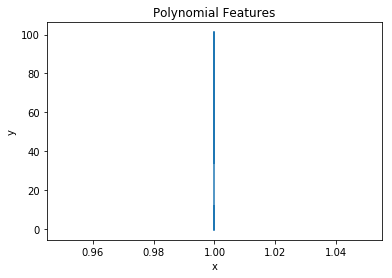

In [126]:
# Plot of first column of our x_train


print(x_train[0:5,1])
plt.plot(x_train[:,0],clf.predict(x_train))
plt.title('Polynomial Features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[34. 74. 87. 11. 64.]


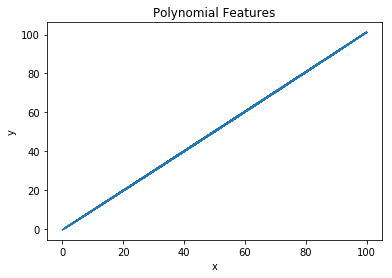

In [123]:
# Plot of second column of our x_train 

print(x_train[0:5,1])
plt.plot(x_train[:,1],clf.predict(x_train))
plt.title('Polynomial Features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[1156. 5476. 7569.  121. 4096.]


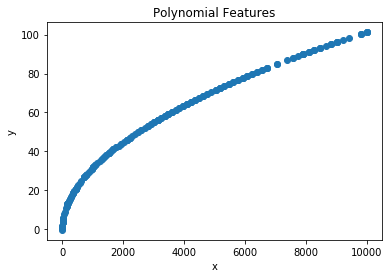

In [125]:
# Plot of 3 column of our x_train

print(x_train[0:5,2])
plt.scatter(x_train[:,2],clf.predict(x_train))
plt.title('Polynomial Features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

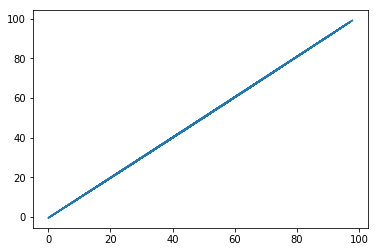

In [131]:
#Plot for x_test

plt.plot(x_test[:,1],clf.predict(x_test))
plt.show()

In [132]:
# Note: In polynomial regression the straight line is not the best fit 
#        but the curve line is the best fit .i.e the 3rd column of x_train
#        is the best fit